# Classification: cat or dog?
In this lab you will teach computer to distinguish between images of cats and dogs using Logistic Regression. 
The input dataset consists of 10,000 images manually labeled as ''cats'' and ''dogs''. The original dataset was downloaded from kaggle. 

Download the entire [folder](https://drive.google.com/file/d/1rjv0hlg6dcn0vMByikYfWpqpkk2vxtXA/view?usp=sharing)  with images and unzip it into your local directory containing input files for this course. Then set the path below to point to this directory.

In [1]:
data_dir = "../data_sets/cat_dog_data"

### Importing all the required libraries
If you get an import error on `keras`, run one of the next 2 cells to install `keras` in the current Jupyter kernel, and then rerun the import cell. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from PIL import Image
from keras import preprocessing

## 1. Input handling
### 1.1. Loading images
First check if the path to the directory is correct:

In [3]:
import os
cwd = os.getcwd()
os.chdir(cwd)
print(os.listdir(data_dir))

['test_set', 'training_set']


Next create two lists and fill them with the paths to the corresponding images. 

In [4]:
train_cats_files = []
train_path_cats = data_dir +"/training_set/cats/"
for path in os.listdir(train_path_cats):
    if '.jpg' in path:
        train_cats_files.append(os.path.join(train_path_cats, path))
        
train_dogs_files = []
train_path_dogs = data_dir +"/training_set/dogs/"
for path in os.listdir(train_path_dogs):
    if '.jpg' in path:
        train_dogs_files.append(os.path.join(train_path_dogs, path))
        
len(train_cats_files), len(train_dogs_files)

(4000, 4000)

Now we have the paths to each image in the training set.
We need to convert each image into a numpy array. For this we use the preprocessing module in the `keras` library. 

In [9]:
k = 200
sample_dog_file = train_dogs_files[k]
img = preprocessing.image.load_img(sample_dog_file, target_size=(64, 64))
img_array = preprocessing.image.img_to_array(img)

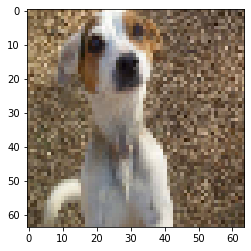

In [10]:
plt.imshow(np.uint8(img_array))

In [11]:
img_array.shape
# print(img_array)

(64, 64, 3)

Each image is represented as a $64*64$ matrix of pixels, and for each pixel we have values of Red, Green, and Blue (RGB). 

### 1.2. Images to numpy arrays
Now we create training sets for cats and for dogs and then concatenate 2 sets into a single `X_train` dataset of features.

In [12]:
# image dimensions: using 32x32 pixels just for speed
d = 32
X_train_orig = np.zeros((8000, d, d, 3), dtype='float32')
for i in range(4000):    
    path = train_cats_files[i]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_train_orig[i] = preprocessing.image.img_to_array(img)

for i in range(4000,8000):    
    path = train_dogs_files[i-4000]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_train_orig[i] = preprocessing.image.img_to_array(img)    

X_train_orig.shape

(8000, 32, 32, 3)

### 1.3. Flatten 3D image arrays
Our model requires each object to be a 1D vector of features -
we need to flatten our 3D image arrays.

After reshaping we will have,
$d*d*3$ features as a single array for each picture in the training set (8000 pics),

In [13]:
X_train = X_train_orig.reshape(8000,-1)
print(X_train[0])
X_train.shape

[33. 37. 40. ... 50. 35. 30.]


(8000, 3072)

### 1.4. Create class labels
Now we need to create the corresponding class label vectors. We will mark the cats as class 1, and the dogs as class 0 (not cats).

In [14]:
Y_train_orig = np.ones((4000,)) # 1 - 4000 are cat pictures so our label is 1
Y_train_orig = np.concatenate((Y_train_orig, np.zeros((4000,)))) # 4000 - 8000 are dog pictures so our label is 0
Y_train = Y_train_orig.reshape(-1)
print("At position 3 should be a cat:", Y_train[3])
print("At position 4002 should be a dog:", Y_train[4002])
Y_train.shape

At position 3 should be a cat: 1.0
At position 4002 should be a dog: 0.0


(8000,)

## 2. Logistic Regression

### 2.1. Build the model
We are using the `LogisticRegression` class from `sklearn` package.
<ul>
<li>The <code>random_state</code> parameter tells to shuffle the samples, so the classifier does not see all the cats first, and then the dogs. Specifying  the `random_state` value ensures that the algorithm starts from the same random seed and produces reproducible results.</li> 
<li>The <code>max_iter</code> parameter tells algorithm to stop even if it did not reach the threshold for convergence yet.</li>
    <li>In the <code>solver</code> parameter you can specify the algorithm which you want to use.</li>
</ul>

You can read more about the parameters of  `LogisticRegression` model [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [15]:
from sklearn import linear_model

algorithms = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] # default='lbfgs'
logreg = linear_model.LogisticRegression(solver=algorithms[4], random_state = 42, max_iter= 1000)
logreg.fit (X_train, Y_train)

C:\Users\MGBar\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


LogisticRegression(max_iter=1000, random_state=42, solver='saga')

The score of the logistic regression classifier is simply a percentage of correctly predicted data points. This measure is called the **accuracy** of the model.

In [16]:
acc_train = logreg.score(X_train, Y_train)
print("train accuracy: {} ".format(acc_train))

train accuracy: 0.771625 


### 2.2. Model evaluation 
Obviously, we are much more interested to see how our model performs on the test data. To create a test set, we repeat steps 1.1-1.4 for the test_set folder.

#### Loading images

In [17]:
test_cats_files = []
test_path_cats = data_dir +"/test_set/cats/"
for path in os.listdir(test_path_cats):
    if '.jpg' in path:
        test_cats_files.append(os.path.join(test_path_cats, path))
        
test_dogs_files = []
test_path_dogs = data_dir +"/test_set/dogs/"
for path in os.listdir(test_path_dogs):
    if '.jpg' in path:
        test_dogs_files.append(os.path.join(test_path_dogs, path))
        
len(test_cats_files), len(test_dogs_files)

(1000, 1000)

#### Images to numpy arrays

In [18]:
X_test_orig = np.zeros((2000, d, d, 3), dtype='float32')  
for i in range(1000):    
    path = test_cats_files[i]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_test_orig[i] = preprocessing.image.img_to_array(img)

for i in range(1000,2000):    
    path = test_dogs_files[i-1000]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_test_orig[i] = preprocessing.image.img_to_array(img)    

X_test_orig.shape

(2000, 32, 32, 3)

#### Flattening 3D image arrays

In [19]:
X_test = X_test_orig.reshape(2000,-1)
print(X_test[0])
X_test.shape

[240. 249. 244. ... 185. 194. 201.]


(2000, 3072)

#### Adding class labels

In [20]:
Y_test_orig = np.ones((1000,)) 
Y_test_orig = np.concatenate((Y_test_orig, np.zeros((1000,)))) 
Y_test = Y_test_orig.reshape(-1)
print("At position 3 should be a cat:", Y_test[3])
print("At position 1002 should be a dog:", Y_test[1002])
Y_test.shape

At position 3 should be a cat: 1.0
At position 1002 should be a dog: 0.0


(2000,)

### Classifier accuracy for the test set

In [21]:
acc_test = logreg.score(X_test, Y_test)
print("test accuracy: {} ".format(acc_test))

test accuracy: 0.593 


### 2.3. Notes on improving the model
If the predictive power of the classifier is too low, we can try to improve the model. We can try the following:

<ol>
    <li>Increase number of iterations.</li>
    <li>Increase value of $d$ (image dimensions) to 64.</li>
    <li>Normalize values in pixel arrays by dividing each value by 255 (max RGB value).</li>
    <li>Use a different model-fitting algorithm.</li>
    <li>Modify default parameters of <code>LogisticRegression</code> class.</li>
    <li>$\ldots$</li>
</ol>

### 2.4. Predict random cats
We can find a random image of a cat and another of a dog, and test your model to predict their class label. We need to follow all the steps to convert two images into an array of features and then call `logregr.predict`.

My set of random images is in file new_set.zip. Unzip it into a data folder and repeat the preprocessing.

In [25]:
new_cats_files = []
new_path_cats = "../data_sets/new_set/cats/"
for path in os.listdir(new_path_cats):
    if '.jpg' in path:
        new_cats_files.append(os.path.join(new_path_cats, path))
        
new_dogs_files = []
new_path_dogs =  "../data_sets/new_set/dogs/"
for path in os.listdir(new_path_dogs):
    if '.jpg' in path:
        new_dogs_files.append(os.path.join(new_path_dogs, path))
        
len(new_cats_files), len(new_dogs_files)

(5, 5)

In [26]:
X_new_orig = np.zeros((10, d, d, 3), dtype='float32')  
for i in range(5):    
    path = new_cats_files[i]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_new_orig[i] = preprocessing.image.img_to_array(img)

for i in range(5,10):    
    path = new_dogs_files[i-5]
    img = preprocessing.image.load_img(path, target_size=(d, d))
    X_new_orig[i] = preprocessing.image.img_to_array(img)    

X_new_orig.shape

(10, 32, 32, 3)

In [27]:
X_new = X_new_orig.reshape(10,-1)
print(X_new[0])
X_new.shape

[255. 255. 255. ... 255. 255. 255.]


(10, 3072)

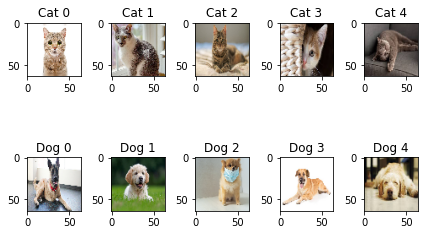

In [28]:
width=10
height=10
rows = 2
cols = 5
axes=[]
fig=plt.figure()

for k in range(cols):
    sample_cat_file = new_cats_files[k]
    axes.append( fig.add_subplot(rows, cols, k+1) )
    subplot_title=("Cat "+str(k))
    axes[-1].set_title(subplot_title)  
    img = preprocessing.image.load_img(sample_cat_file, target_size=(64, 64))
    img_array = preprocessing.image.img_to_array(img)
    plt.imshow(np.uint8(img_array))
    
for k in range(cols):
    sample_dog_file = new_dogs_files[k]
    axes.append( fig.add_subplot(rows, cols, k+5+1) )
    subplot_title=("Dog "+str(k))
    axes[-1].set_title(subplot_title)  
    img = preprocessing.image.load_img(sample_dog_file, target_size=(64, 64))
    img_array = preprocessing.image.img_to_array(img)
    plt.imshow(np.uint8(img_array))
fig.tight_layout()    
plt.show()

In [29]:
Y_new = logreg.predict(X_new)
print("Log regression Predictions: ")
print(Y_new)

Log regression Predictions: 
[1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]


# 3. Support Vector Machines 
The main contribution of Support Vector Machines is the ability to remap the original feature vector to a higher-dimensional space in such a way that the linear decision boundary can separate classes. 

First, watch the [video](https://www.youtube.com/watch?v=efR1C6CvhmE&vl=en) about Support Vector Machine (SVM) classifier.

Next, perform the cat/dog image classification using SVM.
You can learn about the parameters of the sklearn SVC classifier [here](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [30]:
from sklearn.svm import SVC # "Support vector classifier"

kernel_type = ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'] # default='rbf'
#svm = SVC(kernel=kernel_type[0], C=1E3, max_iter=5000, random_state=42)
svm = SVC(kernel=kernel_type[2], C=1, random_state=42)

# train the model
svm.fit (X_train, Y_train)

SVC(C=1, random_state=42)

In [31]:
print("Support Vector Machine")
# accuracy of trained data
acc_train = svm.score(X_train, Y_train)
print("train accuracy: {} ".format(acc_train))

# accuracy of test data
acc_test = svm.score(X_test, Y_test)
print("test accuracy: {} ".format(acc_test))

Support Vector Machine
train accuracy: 0.875125 
test accuracy: 0.6755 


In [33]:
print("Should be:")
print("[1,1,1,1,1,0,0,0,0,0]")
print()
Y_new = logreg.predict(X_new)
print("Log regression Predictions: ")
print(Y_new)
print()
Y_new = svm.predict(X_new)
print("SVM Predictions: ")
print(Y_new)

Should be:
[1,1,1,1,1,0,0,0,0,0]

Log regression Predictions: 
[1. 0. 0. 1. 0. 0. 0. 1. 1. 0.]

SVM Predictions: 
[0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]


### Saving model to file
When you are happy with the performance of your model and want to use it to identify cats in the future, you can save it to file using `pickle`. See if you can save the model and then reload it.

In [34]:
import pickle

# save the model to disk
filename = '../data_sets/cat_dog_model.sav'
pickle.dump(svm, open(filename, 'wb'))


# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
score = loaded_model.score(X_test, Y_test)
print("Test data accuracy from saved model: ", score)

Test data accuracy from saved model:  0.6755


SVM is a more powerful classifier than Logistic Regression. We can achieve an even better accuracy by playing with the algorithm parameters.
<img src="images/svm.png" width="80%">
<p style="text-align:center">Figure 1. SVM: kernel trick.</p>

Copyright &copy; 2022 Marina Barsky. All rights reserved.